In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
ctdf = pd.read_csv('ct_washed.csv')
ctdf.head()

,days,ct_mvha_raw,ct_mv_washed
0,0,498.0,483.0
1,2,357.0,483.0
2,4,401.0,383.0
3,6,372.0,360.0
4,8,285.0,298.0


In [3]:
mvdf = pd.read_csv('mv_unwashed.csv')
mvdf.head()

,days,d_mv_unwashed
0,0,399.0
1,2,312.0
2,4,296.0
3,6,177.0
4,8,219.0


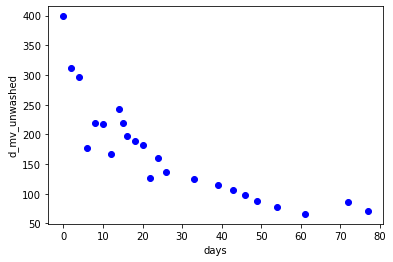

In [4]:
plt.scatter(mvdf.days, mvdf.d_mv_unwashed,  color='blue')
plt.xlabel("days")
plt.ylabel("d_mv_unwashed")
plt.show()

In [5]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 78, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('D (MV Unwashed) vs Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('D (MV Unwashed)')

    plt.show()
    plt.close()

In [6]:
x = mvdf['days']
y = mvdf['d_mv_unwashed']
f = np.polyfit(x, y, 5)
p = np.poly1d(f)
print(p)

            5             4           3         2
-3.357e-06 x + 0.0006955 x - 0.05235 x + 1.774 x - 29.69 x + 374.1


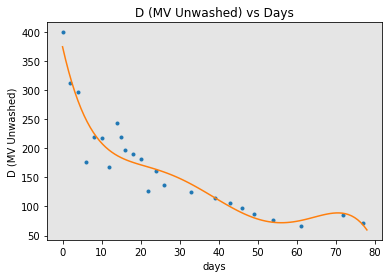

In [7]:
PlotPolly(p, x, y, 'days')

In [8]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.9094749915735367


In [9]:
def PlotPolly2(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 110, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('CT (MVHA Raw) vs Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('CT (MVHA Raw)')

    plt.show()
    plt.close()

In [10]:
x2 = ctdf['days']
y2 = ctdf['ct_mvha_raw']
f2 = np.polyfit(x2, y2, 3)
p2 = np.poly1d(f2)
print(p2)

           3          2
-0.001075 x + 0.2172 x - 14.23 x + 430.4


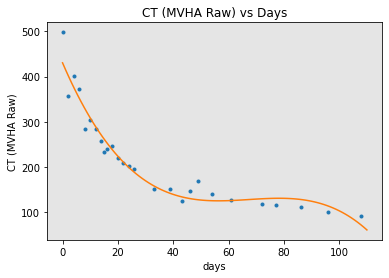

In [11]:
PlotPolly2(p2, x2, y2, 'days')

In [12]:
r_squared2 = r2_score(y2, p2(x2))
print('The R-square value is: ', r_squared2)

The R-square value is:  0.9462938101450663


In [13]:
def PlotPolly3(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 110, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('CT (MV Washed) vs Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('CT (MV Washed)')

    plt.show()
    plt.close()

In [14]:
x3 = ctdf['days']
y3 = ctdf['ct_mv_washed']
f3 = np.polyfit(x3, y3, 3)
p3 = np.poly1d(f3)
print(p3)

           3          2
-0.001276 x + 0.2564 x - 16.41 x + 452.5


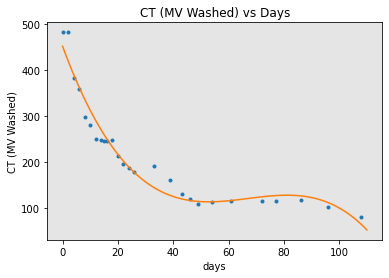

In [15]:
PlotPolly3(p3, x3, y3, 'days')

In [16]:
r_squared3 = r2_score(y3, p3(x3))
print('The R-square value is: ', r_squared3)

The R-square value is:  0.9561248350665912


In [17]:
kcdf = pd.read_csv('revise_kc.csv')
kcdf.head()

,days,d_mf,ct_unwashed,ct_washed
0,0,399.0,498.0,483.0
1,2,311.0,357.0,383.0
2,4,263.0,401.0,360.0
3,6,312.0,372.0,298.0
4,8,296.0,285.0,281.0


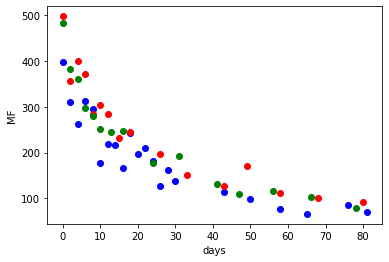

In [18]:
plt.scatter(kcdf.days, kcdf.d_mf,  color='blue')
plt.scatter(kcdf.days, kcdf.ct_unwashed,  color='red')
plt.scatter(kcdf.days, kcdf.ct_washed,  color='green')
plt.xlabel("days")
plt.ylabel("MF")
plt.show()

In [19]:
def PlotPollykc(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 83, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('D_MF vs Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('D_MF')

    plt.show()
    plt.close()

In [23]:
kcdf = kcdf.dropna(subset=['d_mf'])
kcdf.head()

,days,d_mf,ct_unwashed,ct_washed
0,0,399.0,498.0,483.0
1,2,311.0,357.0,383.0
2,4,263.0,401.0,360.0
3,6,312.0,372.0,298.0
4,8,296.0,285.0,281.0


            3        2
-0.0008273 x + 0.16 x - 10.95 x + 346.4


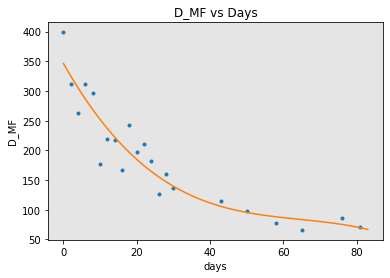

In [24]:
x4 = kcdf['days']
y4 = kcdf['d_mf']
f4 = np.polyfit(x4, y4, 3)
p4 = np.poly1d(f4)
print(p4)
PlotPollykc(p4, x4, y4, 'days')

In [25]:
r_squared4 = r2_score(y4, p4(x4))
print('The R-square value is: ', r_squared4)

The R-square value is:  0.8859024936011379


In [26]:
kcdf2 = pd.read_csv('revise_kc.csv')
kcdf.head()

,days,d_mf,ct_unwashed,ct_washed
0,0,399.0,498.0,483.0
1,2,311.0,357.0,383.0
2,4,263.0,401.0,360.0
3,6,312.0,372.0,298.0
4,8,296.0,285.0,281.0


In [29]:
dmfdf = kcdf2[['days', 'd_mf']]
dmfdf = dmfdf.dropna()
dmfdf.head()

,days,d_mf
0,0,399.0
1,2,311.0
2,4,263.0
3,6,312.0
4,8,296.0


In [38]:
def PlotPolly7(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 81, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('D_MF vs Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('D_MF')

    plt.show()
    plt.close()

In [42]:
x7 = dmfdf['days']
y7 = dmfdf['d_mf']
f7 = np.polyfit(x7, y7, 5)
p7 = np.poly1d(f7)
print(p7)

            5             4           3        2
-1.741e-06 x + 0.0003825 x - 0.03064 x + 1.13 x - 22.56 x + 375.4


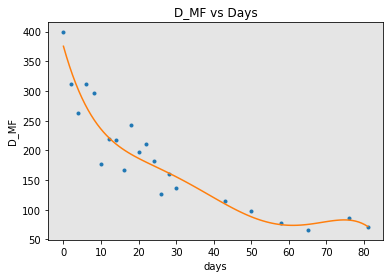

In [43]:
PlotPolly7(p7, x7, y7, 'days')

In [44]:
r_squared7 = r2_score(y7, p7(x7))
print('The R-square value is: ', r_squared7)

The R-square value is:  0.9044037112585465


In [46]:
ctudf = kcdf2[['days', 'ct_unwashed']]
ctudf = ctudf.dropna()
ctudf.head()

,days,ct_unwashed
0,0,498.0
1,2,357.0
2,4,401.0
3,6,372.0
4,8,285.0


In [47]:
def PlotPolly8(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 80, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('CT Unwashed vs Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('CT Unwashed')

    plt.show()
    plt.close()

In [48]:
x8 = ctudf['days']
y8 = ctudf['ct_unwashed']
f8 = np.polyfit(x8, y8, 3)
p8 = np.poly1d(f8)
print(p8)

           3          2
-0.002039 x + 0.3219 x - 17.28 x + 447


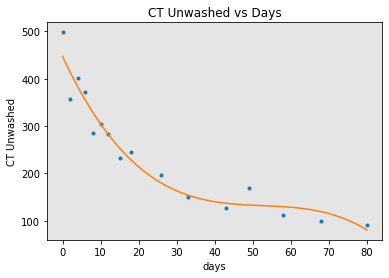

In [49]:
PlotPolly8(p8, x8, y8, 'days')

In [50]:
r_squared8 = r2_score(y8, p8(x8))
print('The R-square value is: ', r_squared8)

The R-square value is:  0.9464419680514097


In [52]:
ctwdf = kcdf2[['days', 'ct_washed']]
ctwdf = ctwdf.dropna()
ctwdf.head()

,days,ct_washed
0,0,483.0
1,2,383.0
2,4,360.0
3,6,298.0
4,8,281.0


In [53]:
def PlotPolly9(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 78, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('CT Washed vs Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('CT Washed')

    plt.show()
    plt.close()

In [54]:
x9 = ctwdf['days']
y9 = ctwdf['ct_washed']
f9 = np.polyfit(x9, y9, 3)
p9 = np.poly1d(f9)
print(p9)

         3          2
-0.0023 x + 0.3459 x - 17.55 x + 426


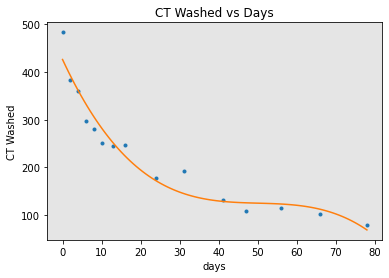

In [55]:
PlotPolly9(p9, x9, y9, 'days')

In [56]:
r_squared9 = r2_score(y9, p9(x9))
print('The R-square value is: ', r_squared9)

The R-square value is:  0.950730873860682
